<h1 style="text-align: center; color: white; font-size: 2em; padding: 25px; background: linear-gradient(90deg, #FFC0CB, #212F3D);">CallAlert - Montco, PA Emergency Calls Data Analysis</h1>

This project focuses on analyzing the "Emergency - 911 Calls" dataset from [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert/) by conducting an Exploratory Data Analysis (EDA) to uncover and visualize patterns and trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/01. 911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
# Dictionary mapping old column names to new column names.
column_rename_mapping = {
    'lat': 'Latitude',
    'lng': 'Longitude',
    'desc': 'Description of Emergency',
    'zip': 'ZIP Code',
    'title': 'Title of Emergency',
    'timeStamp': 'Date and Time of The Call',
    'twp': 'Township',
    'addr': 'General Address',
    'e': 'Index Column, Always 1'
}

# Renaming the columns.
df = df.rename(columns=column_rename_mapping)

In [4]:
# As you can see from this output, several columns exhibit null or missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Latitude                   663522 non-null  float64
 1   Longitude                  663522 non-null  float64
 2   Description of Emergency   663522 non-null  object 
 3   ZIP Code                   583323 non-null  float64
 4   Title of Emergency         663522 non-null  object 
 5   Date and Time of The Call  663522 non-null  object 
 6   Township                   663229 non-null  object 
 7   General Address            663522 non-null  object 
 8   Index Column, Always 1     663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
# Calculate the count and percentage of null values for each column.
null_count = df.isnull().sum()
null_percentage = df.isnull().mean() * 100

# Create a DataFrame to display both count and percentage.
pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

,Null Count,Null Percentage
Latitude,0,0.000000
Longitude,0,0.000000
Description of Emergency,0,0.000000
ZIP Code,80199,12.086864
Title of Emergency,0,0.000000
Date and Time of The Call,0,0.000000
Township,293,0.044158
General Address,0,0.000000
"Index Column, Always 1",0,0.000000


In [6]:
# Considering the low percentage of NaN values in the 'Township' column, drop rows with missing values in this column.
df = df.dropna(subset=['Township'])

In [7]:
# Convert the 'Date and Time of The Call' column to a datetime object for consistency.
df['Date and Time of The Call'] = pd.to_datetime(df['Date and Time of The Call'])

In [8]:
# Extract hour, day of the week, day, month, year, and date information from the 'Date and Time of The Call' column and assign them to new columns.
df['Hour'] = df['Date and Time of The Call'].dt.hour
df['Day of Week'] = df['Date and Time of The Call'].dt.day_name()
df['Day'] = df['Date and Time of The Call'].dt.day
df['Month'] = df['Date and Time of The Call'].dt.month
df['Year'] = df['Date and Time of The Call'].dt.year
df['Date'] = pd.to_datetime(df['Date and Time of The Call'].dt.date)

# Extract year and month from the 'Date' column.
df['Year and Month'] = df['Date'].dt.to_period('M')

# Extract week of the month.
df['Week of Month'] = df['Date'].apply(lambda x: (x.day - 1) // 7 + 1)
# df['Week of Month'] = df['Date'].apply(lambda x: min((x.day - 1) // 7 + 1, 4))

# Extract season from 'Month' column.
# Winter (1): December, January, February
# Spring (2): March, April, May
# Summer (3): June, July, August
# Fall (4): September, October, November
df['Season'] = (df['Month'] % 12 // 3 + 1)

# Map season numbers to season names.
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(season_map)

In [9]:
# This column extracts department information (EMS, Fire, and Traffic) from the 'Title of Emergency' column.
df['Reason of Emergency'] = df['Title of Emergency'].apply(lambda title: title.split(':')[0])

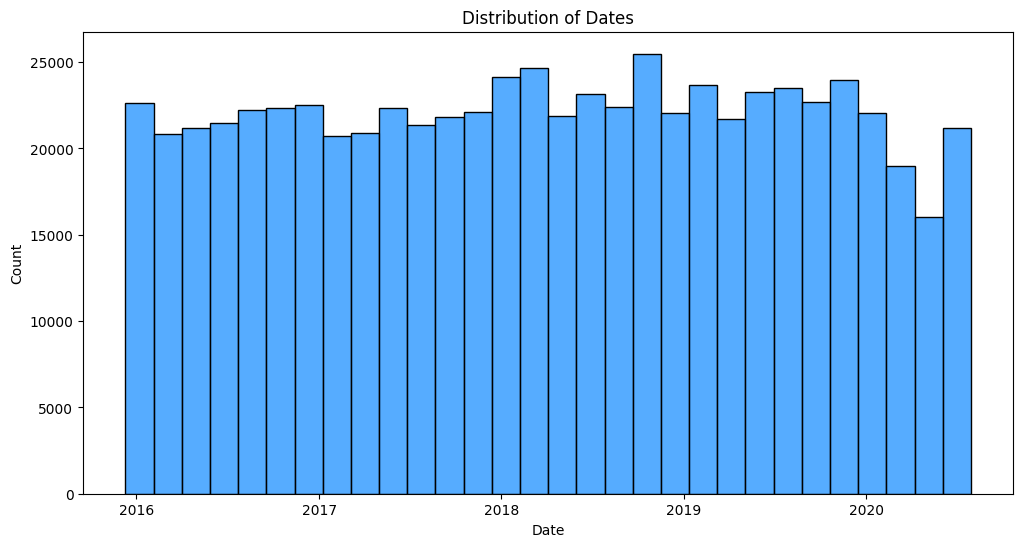

In [10]:
# 01. What is the distribution of dates?
plt.figure(figsize=(12, 6), dpi=100)
sns.histplot(data=df, x='Date', bins=30, color='dodgerblue')
plt.title('Distribution of Dates')
plt.show()

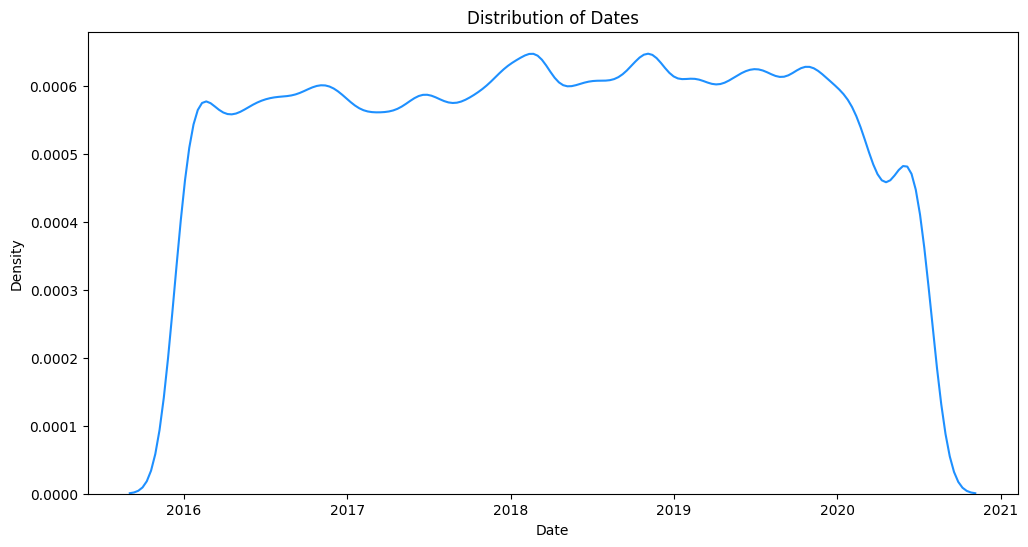

In [11]:
# 01. What is the distribution of dates?
plt.figure(figsize=(12, 6), dpi=100)
sns.kdeplot(data=df, x='Date', color='dodgerblue')
plt.title('Distribution of Dates')
plt.show()

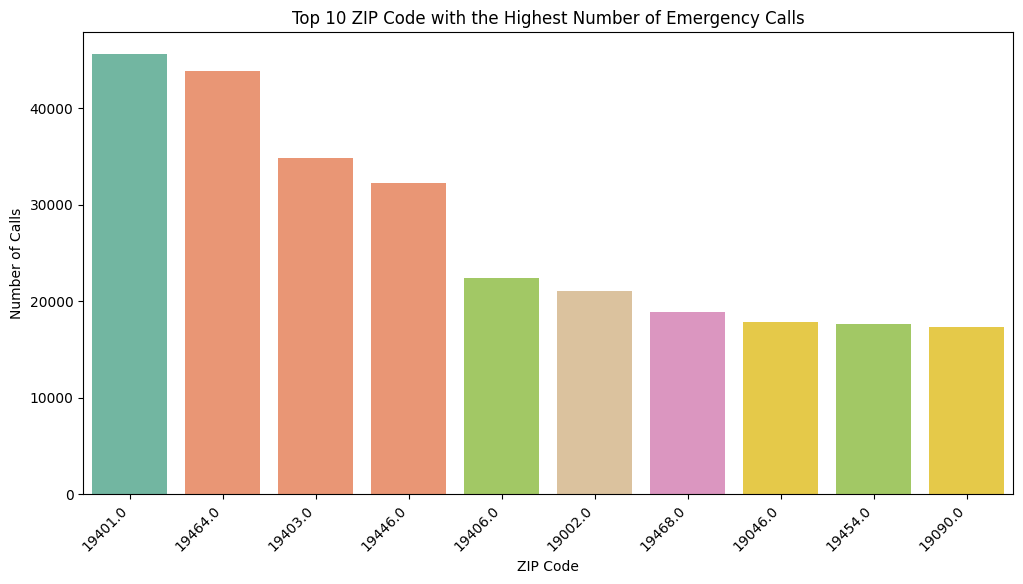

In [12]:
# 02. What are the top 10 ZIP codes with the highest number of emergency calls?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='ZIP Code', hue='ZIP Code', order=df['ZIP Code'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 ZIP Code with the Highest Number of Emergency Calls')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()

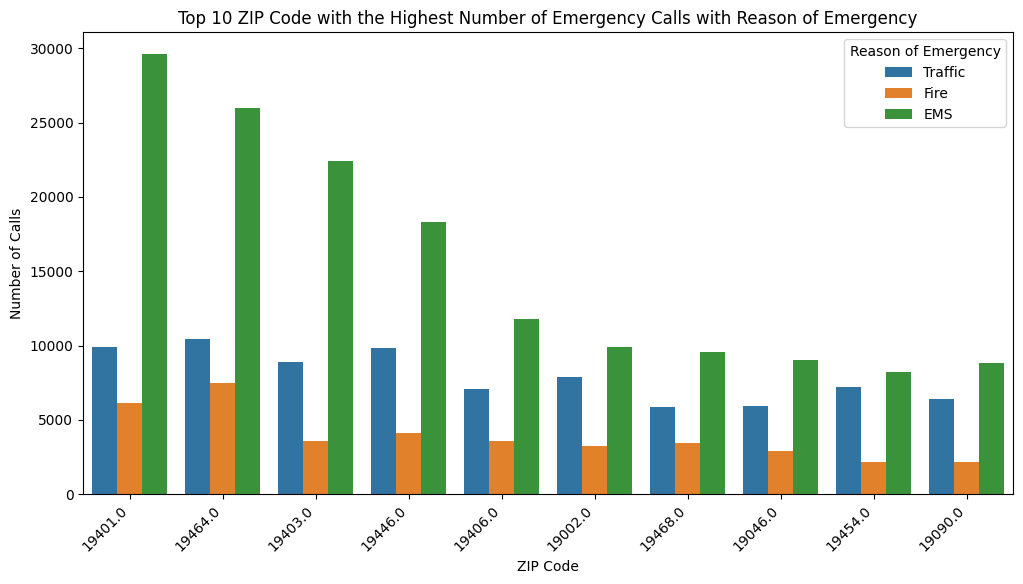

In [13]:
# 02. What are the top 10 ZIP codes with the highest number of emergency calls?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='ZIP Code', hue='Reason of Emergency', order=df['ZIP Code'].value_counts().nlargest(10).index)
plt.title('Top 10 ZIP Code with the Highest Number of Emergency Calls with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()

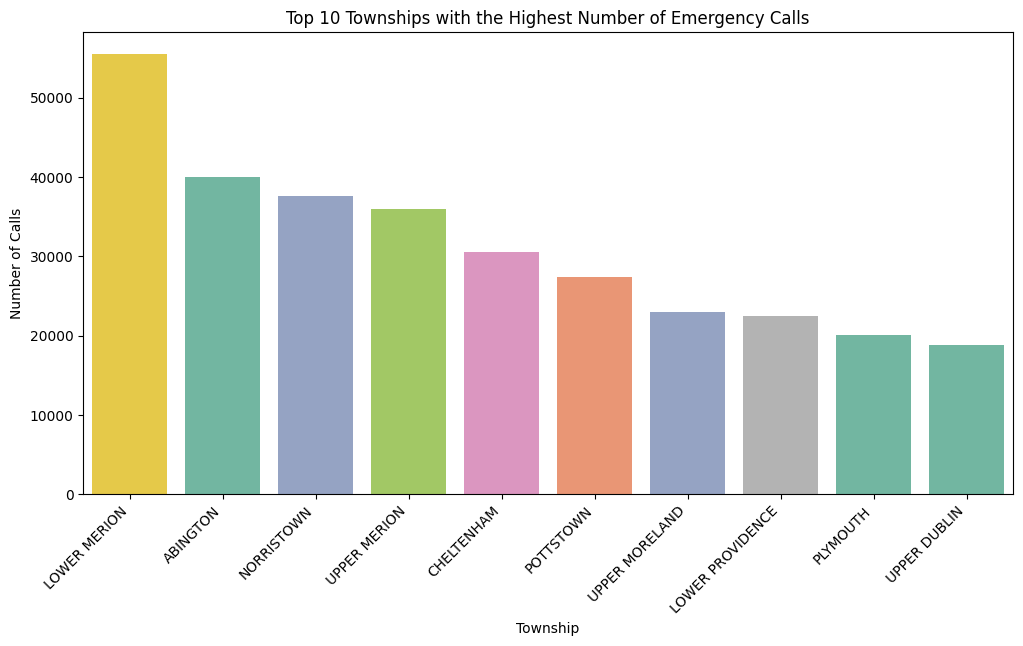

In [14]:
# 03. What are the top 10 townships with the highest number of emergency calls?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Township', hue='Township', order=df['Township'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Townships with the Highest Number of Emergency Calls')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()

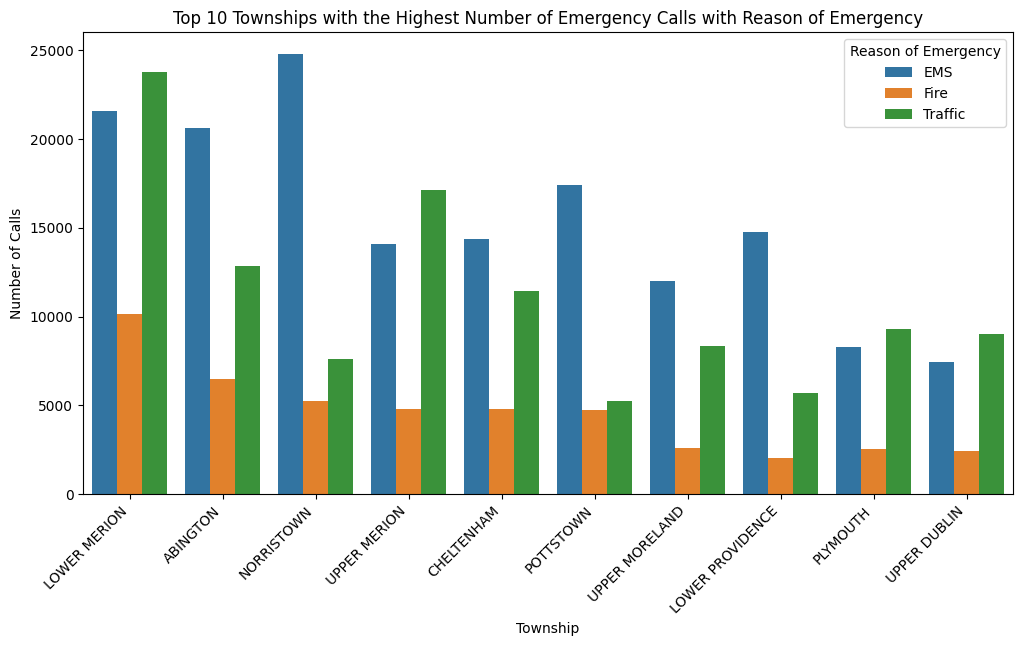

In [15]:
# 03. What are the top 10 townships with the highest number of emergency calls?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Township', hue='Reason of Emergency', order=df['Township'].value_counts().nlargest(10).index)
plt.title('Top 10 Townships with the Highest Number of Emergency Calls with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()

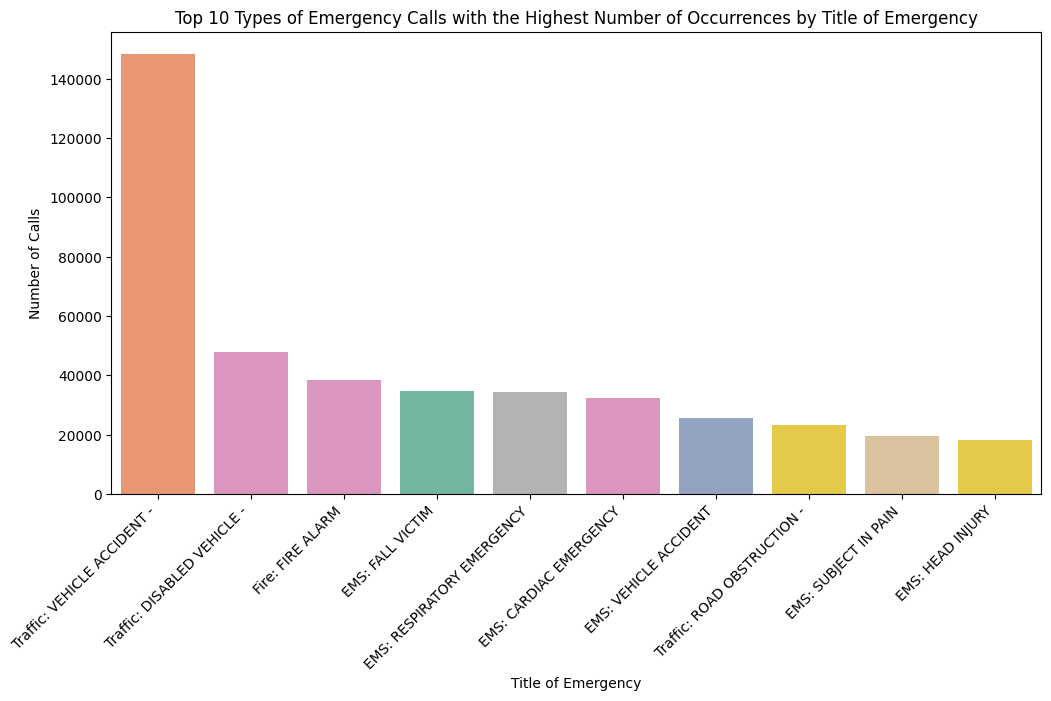

In [16]:
# 04. What are the top 10 types of emergency calls with the highest number of occurrences (based on the 'Title of Emergency')?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Title of Emergency', hue='Title of Emergency', order=df['Title of Emergency'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Types of Emergency Calls with the Highest Number of Occurrences by Title of Emergency')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.show()

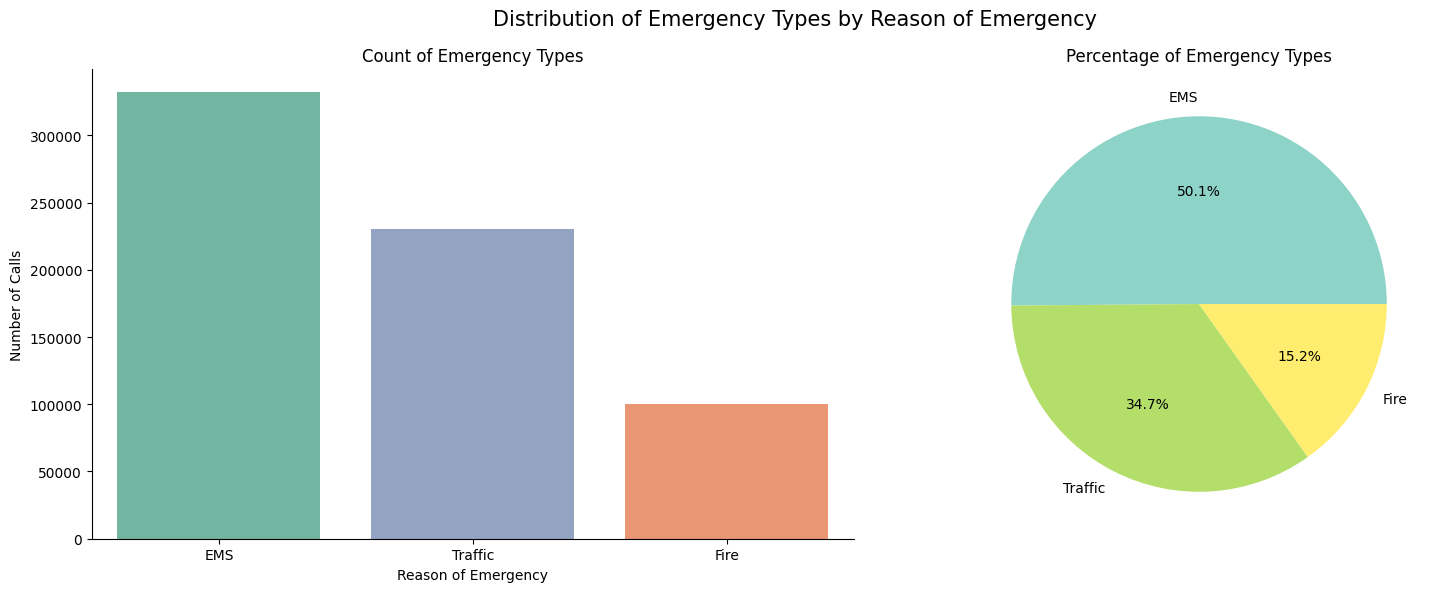

In [17]:
# 05. What are the types of emergency (based on the 'Reason of Emergency')?
fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Plot 1: Count Plot
sns.countplot(data=df, x='Reason of Emergency', hue='Reason of Emergency', order=df['Reason of Emergency'].value_counts().index, palette='Set2', legend=False, ax=axs[0])
axs[0].set_title('Count of Emergency Types')
axs[0].set(ylabel='Number of Calls')

# Plot 2: Pie Chart
df['Reason of Emergency'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colormap='Set3')
axs[1].set_title('Percentage of Emergency Types')
axs[1].set(ylabel='')

plt.suptitle('Distribution of Emergency Types by Reason of Emergency', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [18]:
# 05. What are the types of emergency (based on the 'Reason of Emergency')?
df['Reason of Emergency'].value_counts().reset_index(name='Number of Calls')

,Reason of Emergency,Number of Calls
0,EMS,332480
1,Traffic,230204
2,Fire,100545


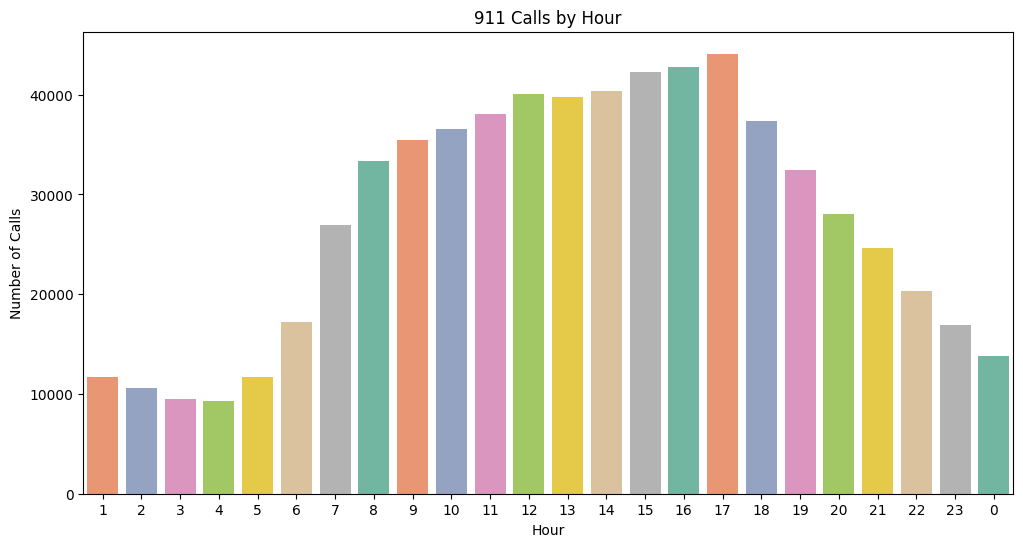

In [19]:
# 06. How does the number of emergency calls vary by hour?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Hour', hue='Hour', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0], palette='Set2', legend=False)
plt.title('911 Calls by Hour')
plt.ylabel('Number of Calls')
plt.show()

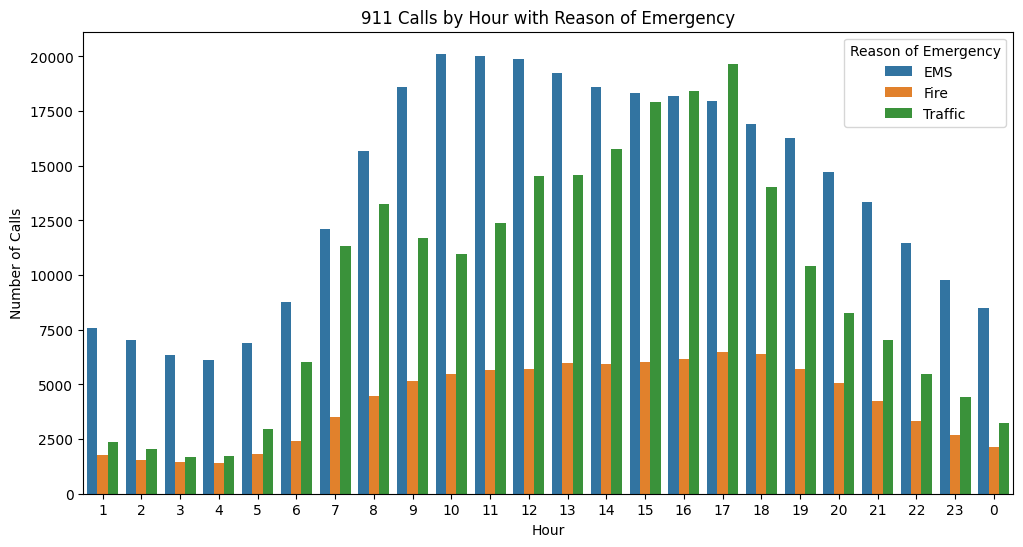

In [20]:
# 06. How does the number of emergency calls vary by hour?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Hour', hue='Reason of Emergency', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0])
plt.title('911 Calls by Hour with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.show()

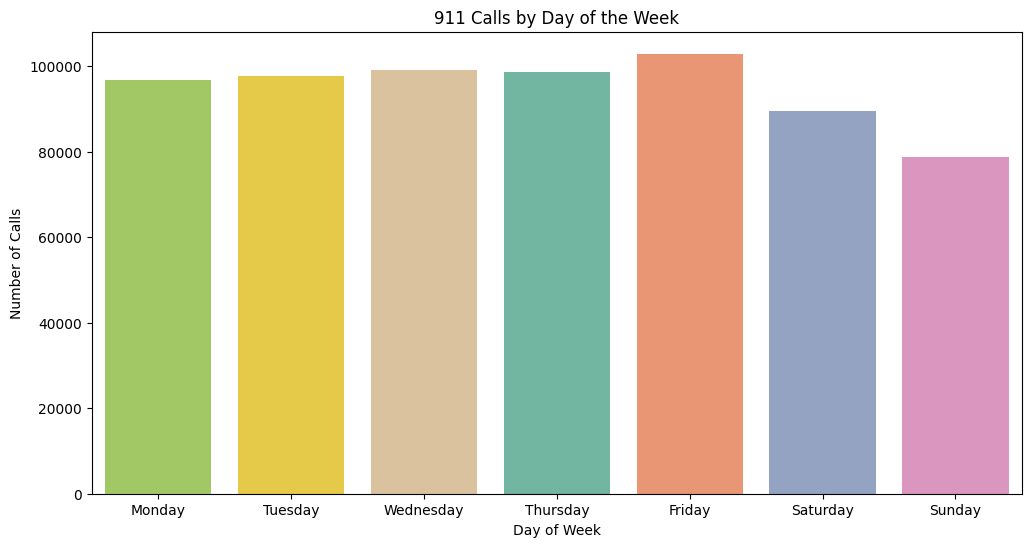

In [21]:
# 07. How does the number of emergency calls vary by day of the week?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Day of Week', hue='Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2', legend=False)
plt.title('911 Calls by Day of the Week')
plt.ylabel('Number of Calls')
plt.show()

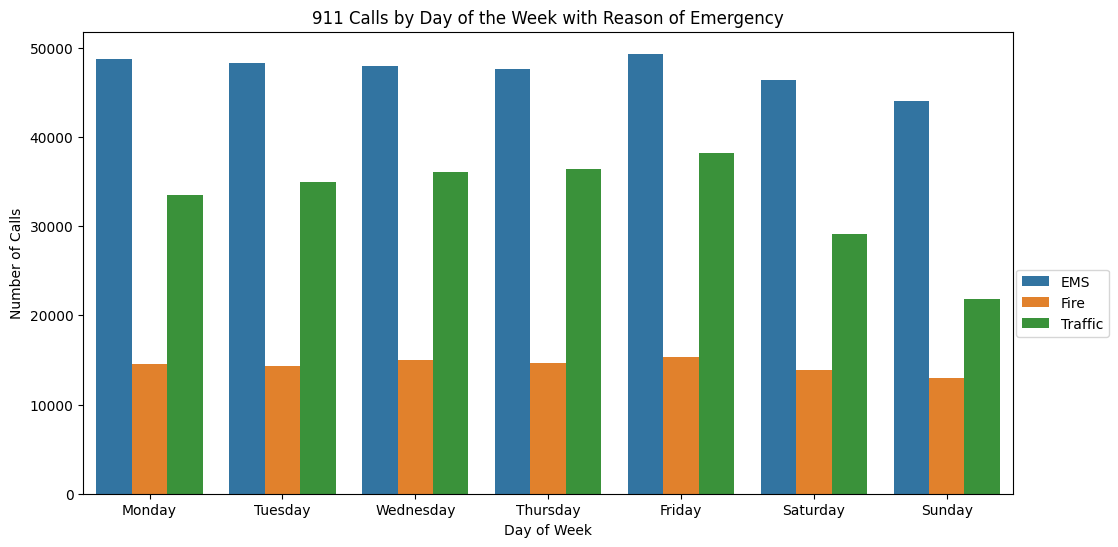

In [22]:
# 07. How does the number of emergency calls vary by day of the week?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Day of Week', hue='Reason of Emergency', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('911 Calls by Day of the Week with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.11, 0.5))
plt.show()

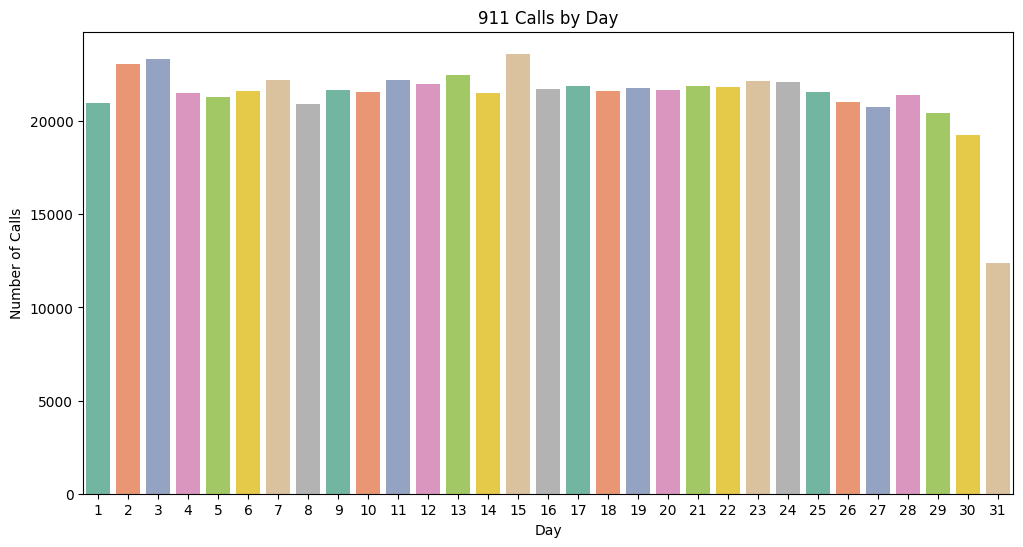

In [23]:
# 08. How does the number of emergency calls vary by day?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Day', hue='Day', palette='Set2', legend=False)
plt.title('911 Calls by Day')
plt.ylabel('Number of Calls')
plt.show()

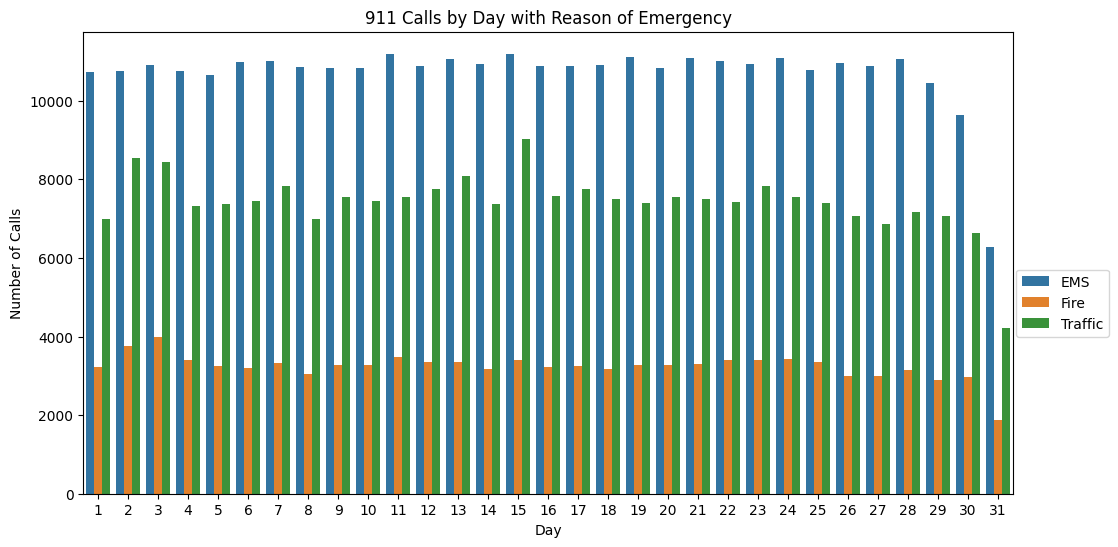

In [24]:
# 08. How does the number of emergency calls vary by day?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Day', hue='Reason of Emergency')
plt.title('911 Calls by Day with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.11, 0.5))
plt.show()

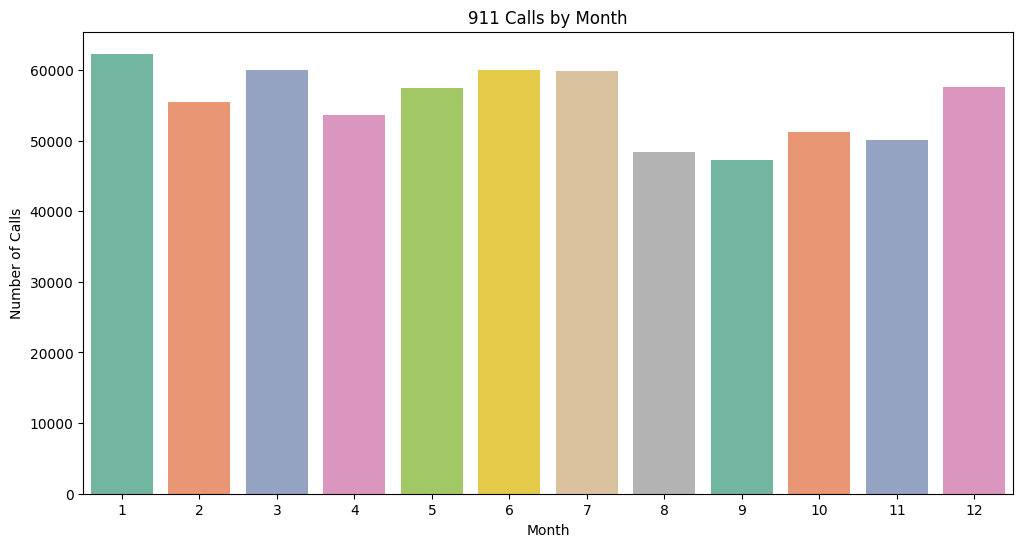

In [25]:
# 09. How does the number of emergency calls vary by month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Month', hue='Month', palette='Set2', legend=False)
plt.title('911 Calls by Month')
plt.ylabel('Number of Calls')
plt.show()

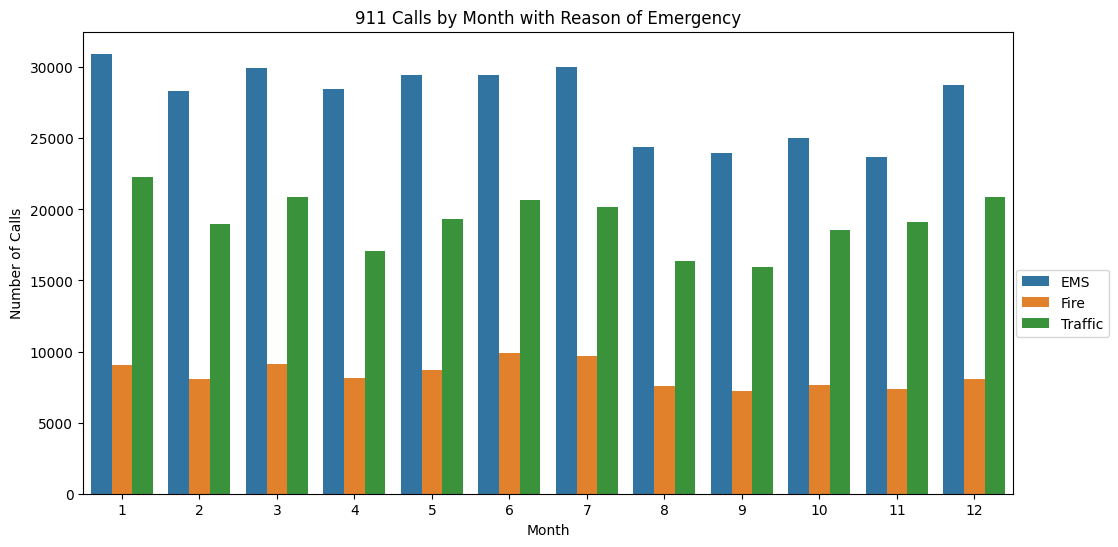

In [26]:
# 09. How does the number of emergency calls vary by month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Month', hue='Reason of Emergency')
plt.title('911 Calls by Month with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.11, 0.5))
plt.show()

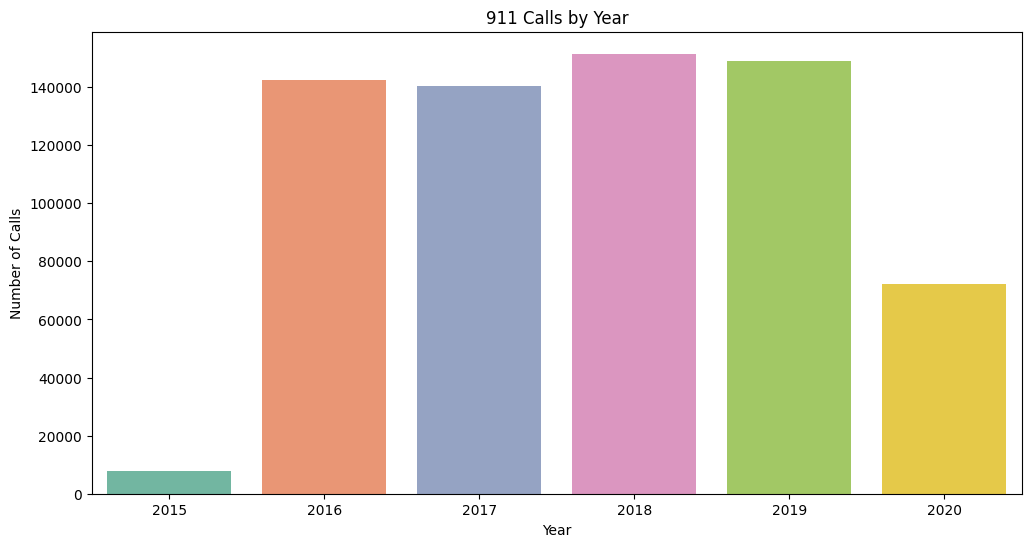

In [27]:
# 10. How does the number of emergency calls vary by year?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Year', hue='Year', palette='Set2', legend=False)
plt.title('911 Calls by Year')
plt.ylabel('Number of Calls')
plt.show()

In [28]:
# 10. How does the number of emergency calls vary by year?
df.groupby('Year').size().reset_index(name='Number of Calls')

,Year,Number of Calls
0,2015,7911
1,2016,142317
2,2017,140288
3,2018,151463
4,2019,149035
5,2020,72215


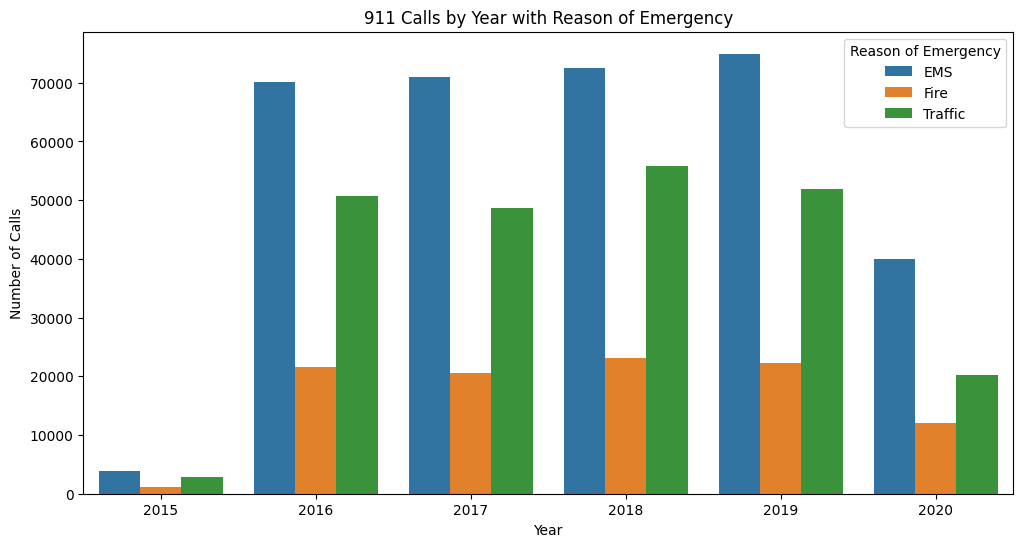

In [29]:
# 10. How does the number of emergency calls vary by year?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Year', hue='Reason of Emergency')
plt.title('911 Calls by Year with Reason of Emergency')
plt.ylabel('Number of Calls')
plt.show()

In [30]:
# 10. How does the number of emergency calls vary by year?
df.groupby(['Year', 'Reason of Emergency']).size().reset_index(name='Number of Calls')

,Year,Reason of Emergency,Number of Calls
0,2015,EMS,3896
1,2015,Fire,1092
2,2015,Traffic,2923
3,2016,EMS,70092
4,2016,Fire,21570
5,2016,Traffic,50655
6,2017,EMS,71014
7,2017,Fire,20539
8,2017,Traffic,48735
9,2018,EMS,72542


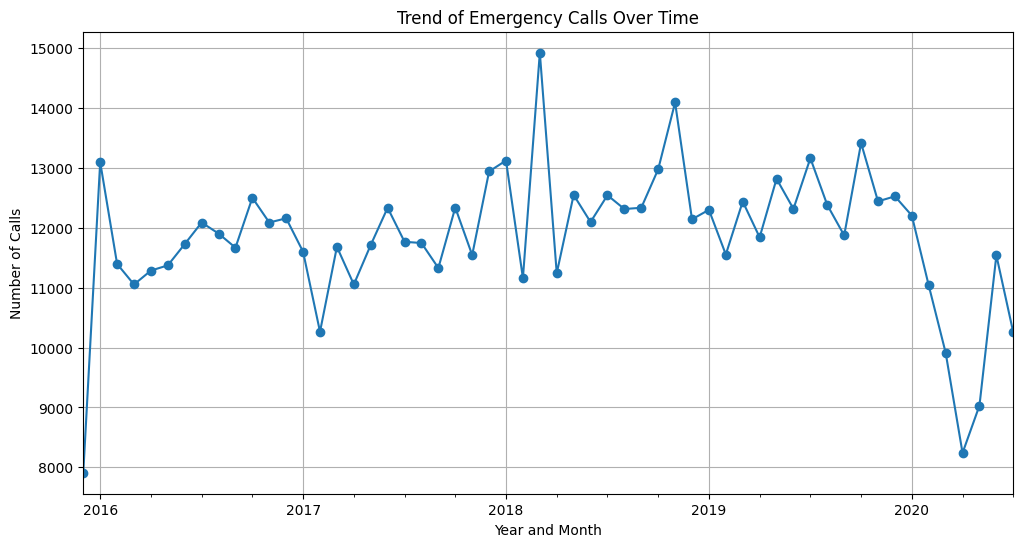

In [31]:
# 11. How does the number of emergency calls vary over months and years?
# Count the number of emergency calls per month.
monthly_calls = df['Year and Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6), dpi=100)
monthly_calls.plot(marker='o')
plt.title('Trend of Emergency Calls Over Time')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

In [32]:
# 12. What are the most common emergencies for each township?
common_emergencies_by_township = df.groupby('Township')['Reason of Emergency'].agg(lambda x: x.value_counts().idxmax())
most_common_emergencies_df = pd.DataFrame(common_emergencies_by_township).reset_index()
most_common_emergencies_df.columns = ['Township', 'Most Common Emergency']

most_common_emergencies_df.head()

,Township,Most Common Emergency
0,ABINGTON,EMS
1,AMBLER,EMS
2,BERKS COUNTY,EMS
3,BRIDGEPORT,EMS
4,BRYN ATHYN,Traffic


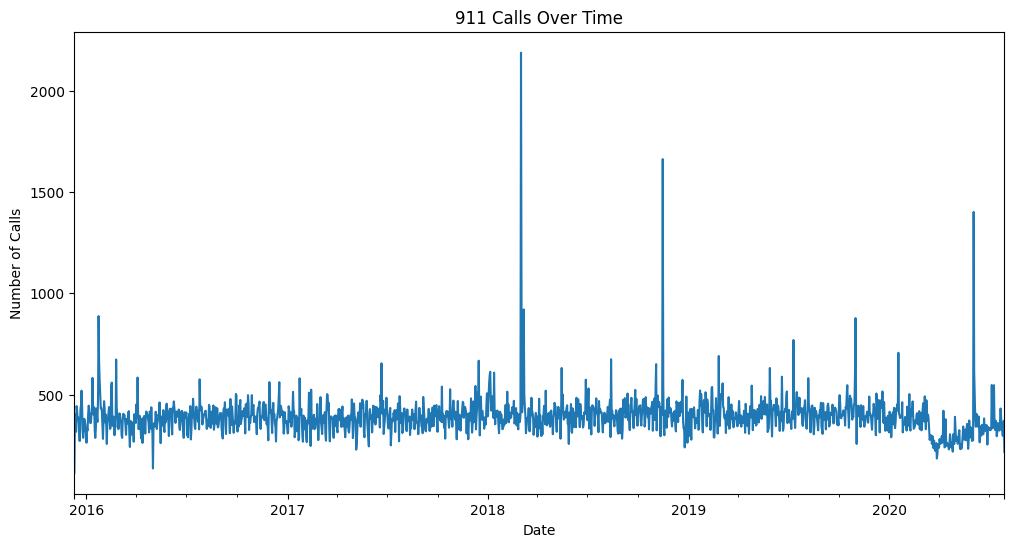

In [33]:
# 13. Can we identify any seasonal patterns in the frequency of 911 calls?
plt.figure(figsize=(12, 6), dpi=100)
df.groupby('Date').size().plot()
plt.title('911 Calls Over Time')
plt.ylabel('Number of Calls')
plt.show()

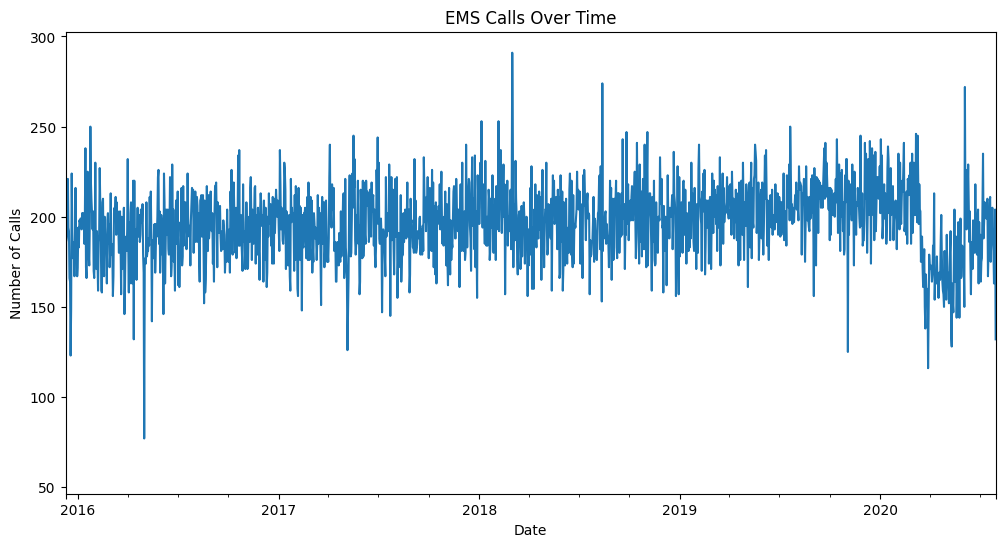

In [34]:
# Plotting the number of EMS (Emergency Medical Service) calls over time.
plt.figure(figsize=(12, 6), dpi=100)
df[df['Reason of Emergency']=='EMS'].groupby('Date').size().plot()
plt.title('EMS Calls Over Time')
plt.ylabel('Number of Calls')
plt.show()

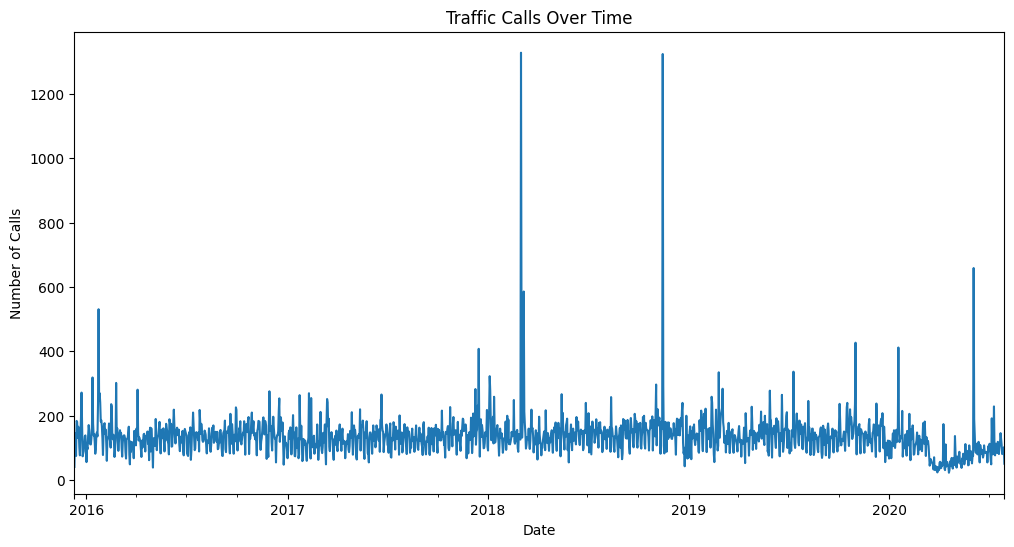

In [35]:
# Plotting the number of Traffic calls over time.
plt.figure(figsize=(12, 6), dpi=100)
df[df['Reason of Emergency']=='Traffic'].groupby('Date').size().plot()
plt.title('Traffic Calls Over Time')
plt.ylabel('Number of Calls')
plt.show()

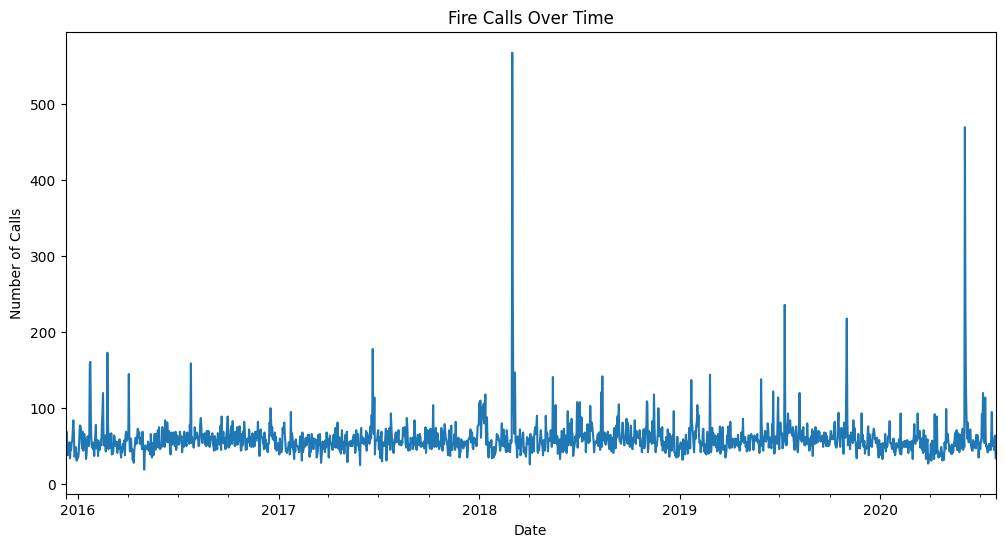

In [36]:
# Plotting the number of Fire calls over time.
plt.figure(figsize=(12, 6), dpi=100)
df[df['Reason of Emergency']=='Fire'].groupby('Date').size().plot()
plt.title('Fire Calls Over Time')
plt.ylabel('Number of Calls')
plt.show()

In [37]:
# Creating a DataFrame to analyze the frequency of calls by day of the week and hour of the day, needed for generating a heatmap and clustermap visualization.
dayHour = df.groupby(['Day of Week', 'Hour'], observed=False).size().unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Monday,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Saturday,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sunday,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thursday,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351


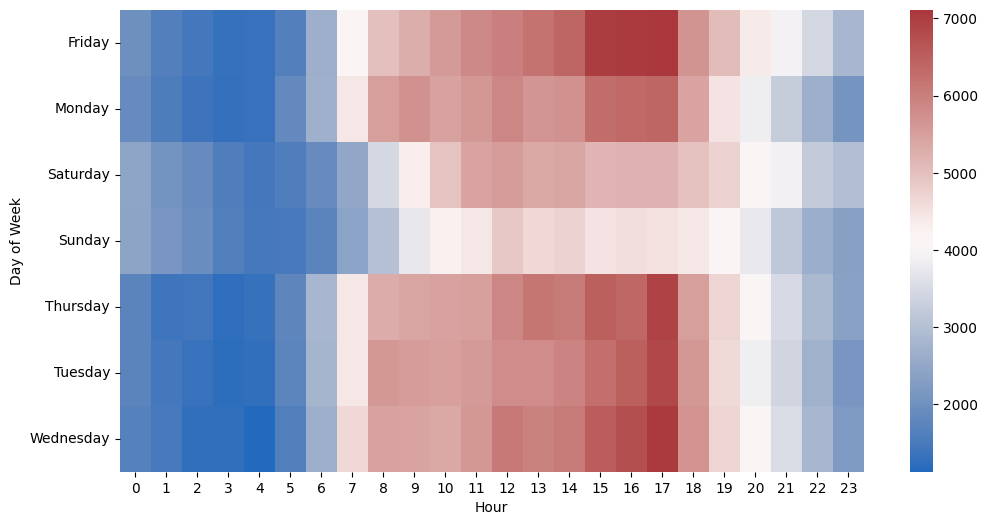

In [38]:
# 14. What are the busiest hours of the day for emergency calls, and do these patterns vary by day of the week?
plt.figure(figsize=(12, 6), dpi=100)
sns.heatmap(dayHour, cmap='vlag')
plt.show()

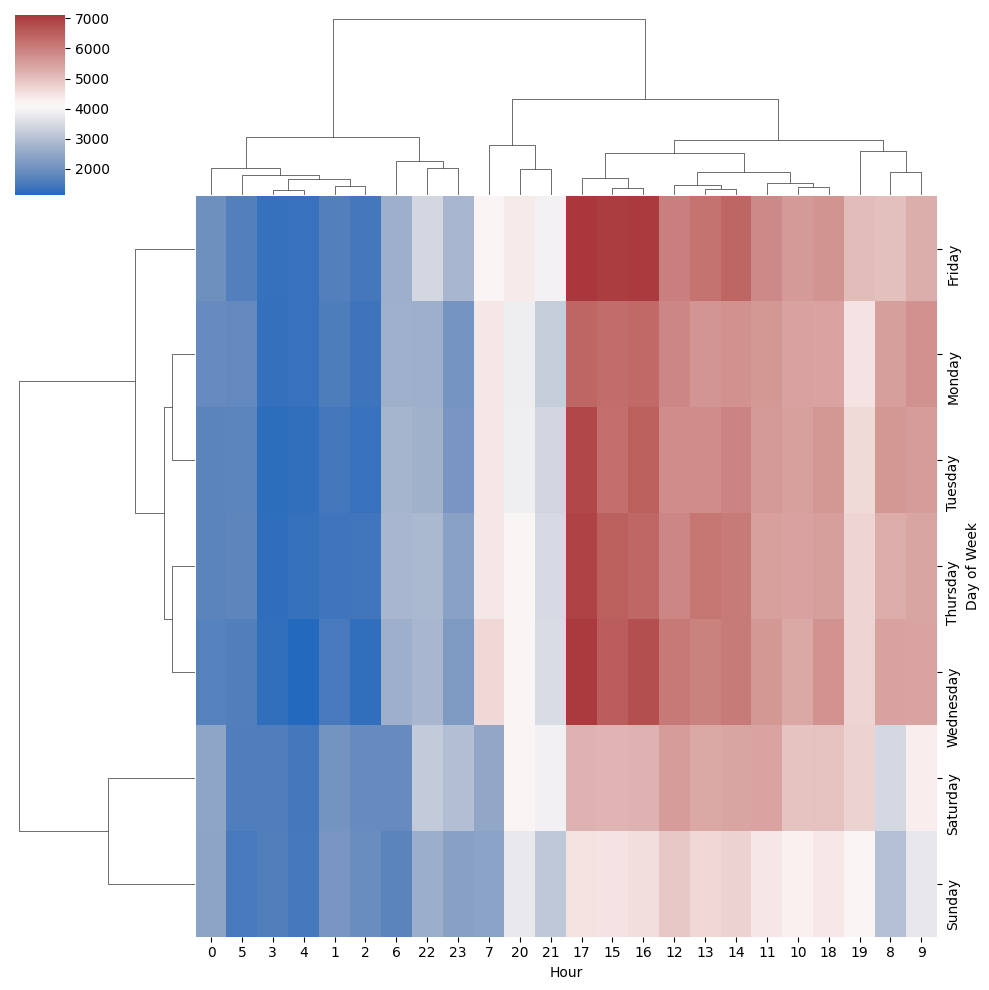

In [39]:
# 15. How does the frequency of emergency calls change throughout the day for each day of the week?
sns.clustermap(dayHour, cmap='vlag')
plt.show()

In [40]:
# Creating a DataFrame to analyze the frequency of calls by day of the week and month, needed for generating a heatmap and clustermap visualization.
dayMonth = df.groupby(['Day of Week', 'Month'], observed=False).size().unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,9305,8251,10932,7995,8899,9202,8677,7332,7689,6931,8379,9303
Monday,8894,8743,8057,8407,7876,8510,9496,6853,6598,8068,6716,8489
Saturday,8467,7589,8043,7511,7221,8195,7745,6108,6563,6607,6767,8588
Sunday,7476,6450,6763,6862,6688,6832,7854,5272,5955,6315,5194,7162
Thursday,9053,7995,8849,7721,8736,9486,8376,7502,6952,7482,8353,8147


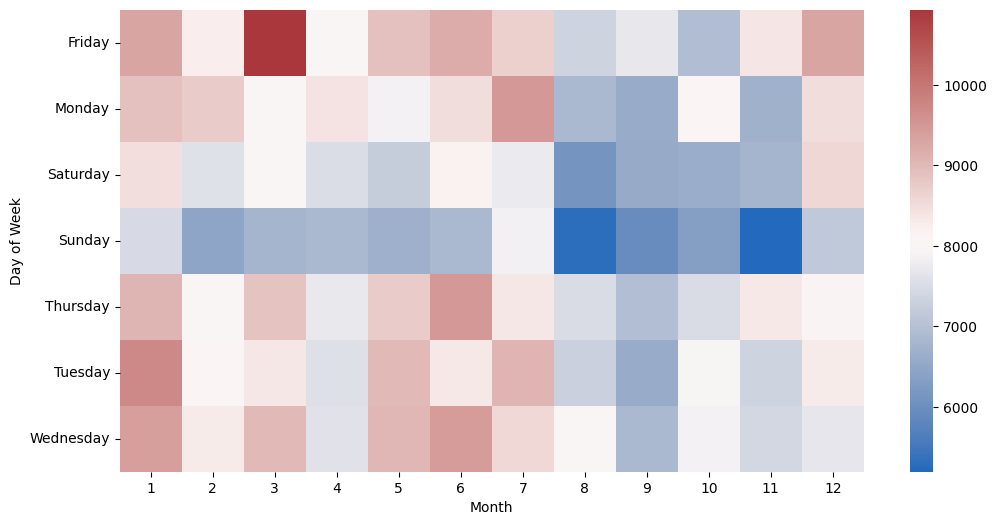

In [41]:
# 16. How does the frequency of emergency calls vary across different months of the year?
plt.figure(figsize=(12, 6), dpi=100)
sns.heatmap(dayMonth, cmap='vlag')
plt.show()

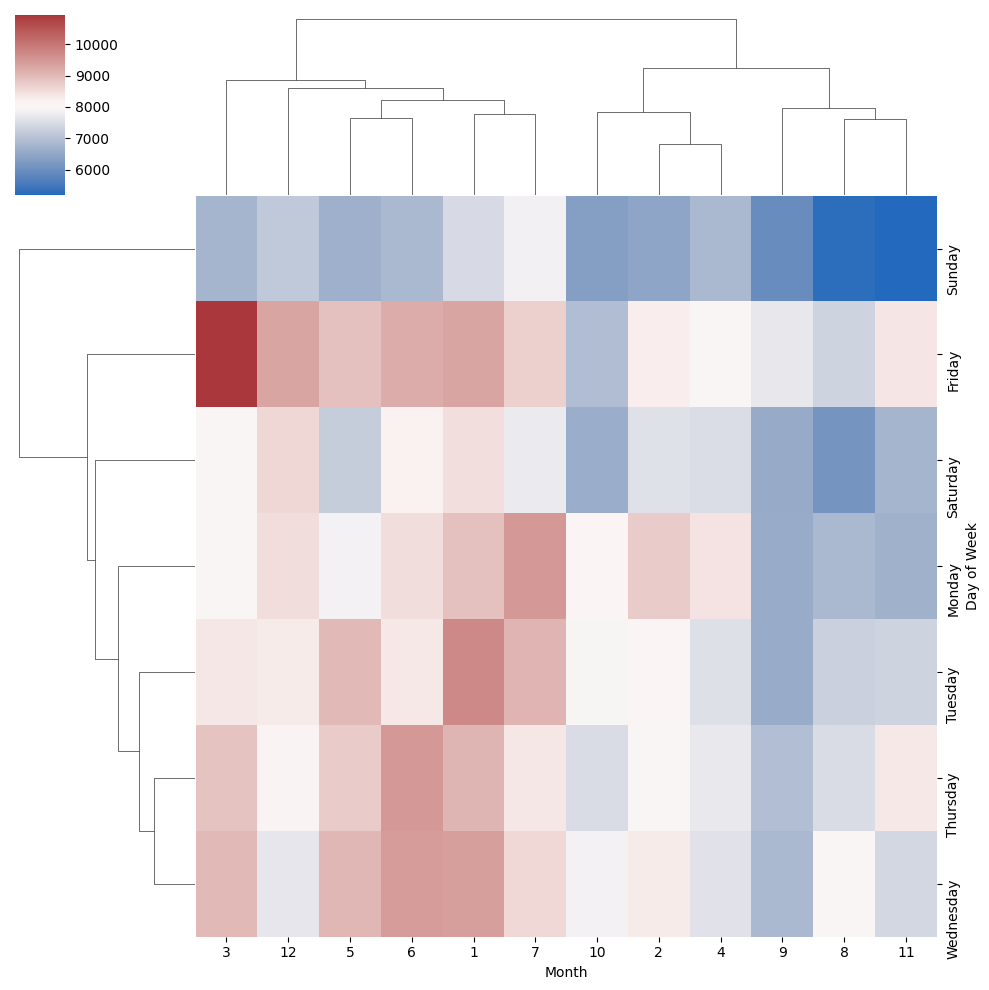

In [42]:
# 17. Are there any noticeable differences in call volume during specific hours between weekdays and weekends?
sns.clustermap(dayMonth, cmap='vlag')
plt.show()